# Домашнее задание «Деревья решений»

Для выполнения домашнего задания необходимо взять файл boston house-prices datase (sklearn.datasets.load_boston) и построить модель.
По аналогии задания к лекции «Классификация: Логистическая регрессия и SVM».
А именно построить модель регрессии, дерево решений, оптимизировать параметры и сравнить результаты.

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC


In [3]:
boston = load_boston()
df = pd.read_csv(boston['filename'], skiprows=1)
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


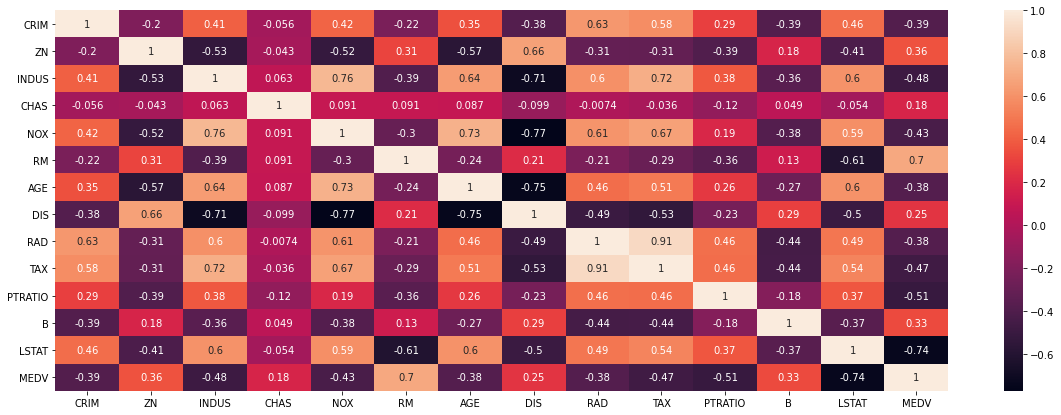

In [4]:
# correlation matrix
plt.figure(figsize=(20, 7))
sns.heatmap(data=df.corr(), annot=True)
plt.show()


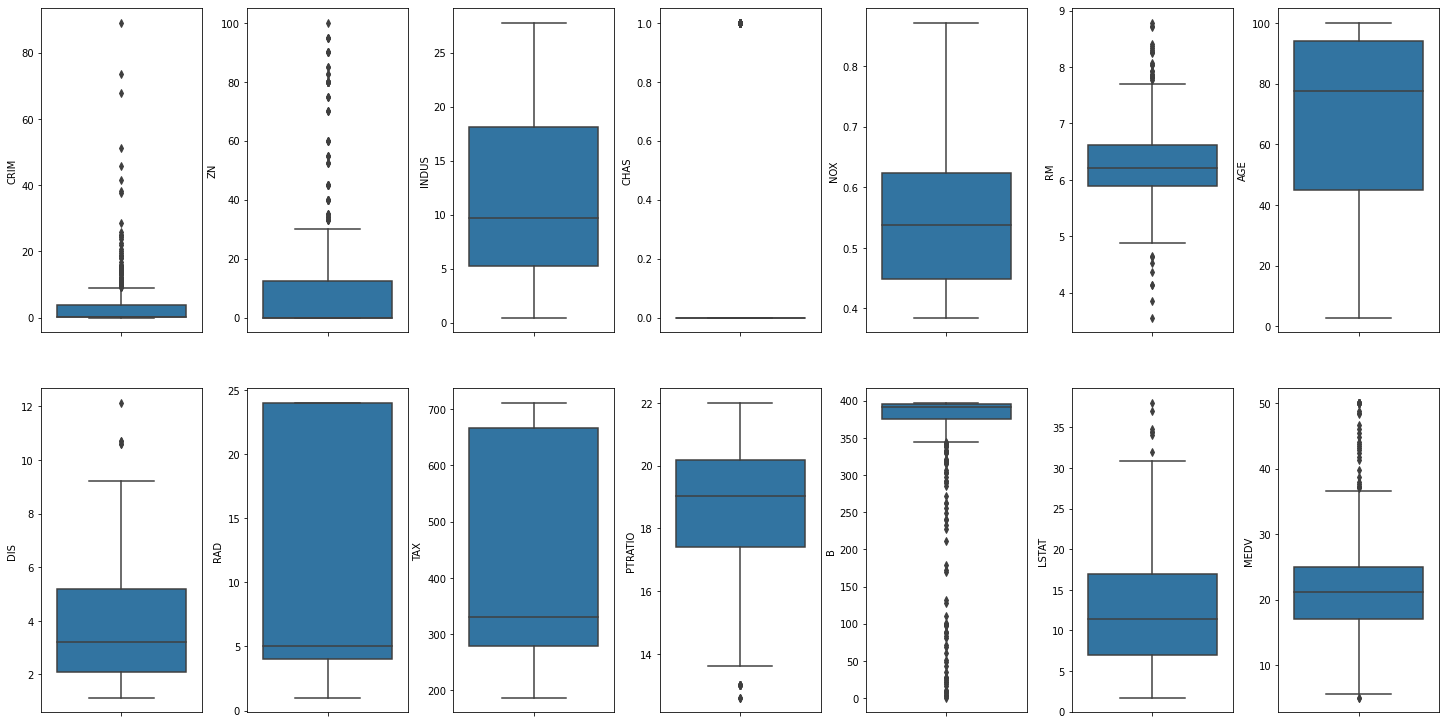

In [5]:
# see outliers
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k, v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


In [6]:
# remove MEDV outliers
df = df[~(df['MEDV'] >= 50.0)]


In [7]:
cols = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
X = df[cols]
y = df[['MEDV']]

In [8]:
# to create classifier models we need to encode target to int values (not sure about it but task is to create LogisticRegression model)
lab_enc = LabelEncoder()
y_encoded = lab_enc.fit_transform(y)


D:\Python\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [9]:
logistic_regression_model = make_pipeline(
    StandardScaler(), LogisticRegression(max_iter=1000))
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42)

logistic_regression_model.fit(X_train, y_train)
predictions = logistic_regression_model.predict(X_test)

# check accuracy of the predictions
print(
    f'Test prediction score {logistic_regression_model.score(X_test, y_test)}')
print(
    f'Train prediction score {logistic_regression_model.score(X_train, y_train)}')


Test prediction score 0.013605442176870748
Train prediction score 0.22448979591836735


In [10]:
SVC_model = make_pipeline(StandardScaler(), SVC(gamma='auto'))
SVC_model.fit(X_train, y_train)
SVC_model.score(X_train, y_train)


0.11370262390670553

In [11]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
decision_tree_model.score(X_train, y_train)


1.0

In [13]:
min_max_scaler = MinMaxScaler()
X_scaled = pd.DataFrame(
    data=min_max_scaler.fit_transform(X), columns=cols)
X_scaled.head()


,LSTAT,INDUS,NOX,PTRATIO,RM,TAX,DIS,AGE
0,0.083356,0.058148,0.314815,0.287234,0.577505,0.208015,0.268711,0.641607
1,0.198944,0.234444,0.172840,0.553191,0.547998,0.104962,0.348524,0.782698
2,0.056960,0.234444,0.172840,0.553191,0.694386,0.104962,0.348524,0.599382
3,0.026674,0.053333,0.150206,0.648936,0.658555,0.066794,0.448173,0.441813
4,0.093081,0.053333,0.150206,0.648936,0.687105,0.066794,0.448173,0.528321


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)
linReg = LinearRegression()
linReg.fit(X_train, y_train)
linReg.score(X_test, y_test)


0.7268554888697856

In [17]:
desc_tr = DecisionTreeRegressor(max_depth=5)
desc_tr.fit(X_train, y_train)
desc_tr.score(X_test, y_test)


0.8103441901010329